# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [4]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [5]:
data



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['MEDV'])
y = data['MEDV']

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


## 3. Calculate and print R-squared for both the training and the testing set.

In [9]:
r2_train = r2_score(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)

print(f"R-squared on Training Set: {r2_train:.6f}")
print(f"R-squared on Testing Set: {r2_test:.4f}")

R-squared on Training Set: 0.750886
R-squared on Testing Set: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [13]:
mse_train = mean_squared_error(y_train, y_train_pred) # Calculating  MSE for testing set

mse_test = mean_squared_error(y_test, y_test_pred) # Calculate MSE for testing set



print(f"Mean Squared Error on Training Set: {mse_train:.4f}")
print(f"Mean Squared Error on Testing Set: {mse_test:.4f}")

Mean Squared Error on Training Set: 21.6414
Mean Squared Error on Testing Set: 24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [14]:
from sklearn.metrics import mean_absolute_error


mae_train = mean_absolute_error(y_train, y_train_pred)


mae_test = mean_absolute_error(y_test, y_test_pred)


print(f"Mean Absolute Error on Training Set: {mae_train:.4f}")


print(f"Mean Absolute Error on Testing Set: {mae_test:.4f}")

Mean Absolute Error on Training Set: 3.3148
Mean Absolute Error on Testing Set: 3.1891


## Classification Model Evaluation

In [29]:
from sklearn.datasets import load_iris
data = load_iris()


In [30]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [17]:
column_names = data.feature_names

In [18]:
df = pd.DataFrame(data['data'],columns=column_names)

In [19]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
target = pd.DataFrame(data.target)

In [21]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [22]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [45]:
from sklearn.linear_model import LogisticRegression
data = load_iris()

X = data.data
y = data.target

X_lg_train, X_lg_test, y_lg_train, y_lg_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_lg_train_pred = model.predict(X_train)
y_lg_test_pred = model.predict(X_test)



## 8. Calculate and print the accuracy score for both the training and the testing set.

In [ ]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_train = accuracy_score(y_lg_train, y_lg_train_pred)
accuracy_test = accuracy_score(y_lg_test, y_lg_test_pred)

print("Training accuracy score:", accuracy_train)
print("Testing accuracy score:", accuracy_test)


Training accuracy score: 0.975
Testing accuracy score: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [56]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_train = balanced_accuracy_score(y_lg_train, y_lg_train_pred)
balanced_accuracy_test = balanced_accuracy_score(y_lg_test, y_lg_test_pred)

print(balanced_accuracy_train)
print(balanced_accuracy_test)

0.975609756097561
1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [66]:
from sklearn.metrics import precision_score

precision_train = precision_score(y_lg_train, y_lg_train_pred, average= 'macro')
precision_test = precision_score(y_lg_test, y_lg_test_pred, average='macro')

print(precision_train)
print(precision_test)

0.9761904761904763
1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [63]:
from sklearn.metrics import recall_score

recall_train = recall_score(y_lg_train, y_lg_train_pred, average='macro')
recall_test = recall_score(y_lg_test, y_lg_test_pred, average='macro')

# Print results
print(f"Recall on Training Set: {recall_train:.4f}")
print(f"Recall on Testing Set:  {recall_test:.4f}")

Recall on Training Set: 0.9756
Recall on Testing Set:  1.0000


## 12. Calculate and print the F1 score for both the training and the testing set.

In [68]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_lg_train, y_lg_train_pred, average='macro')
f1_test = f1_score(y_lg_test, y_lg_test_pred, average= 'macro')

print(f"F1 Score on Training Set: {f1_train:.4f}")
print(f"F1 Score on Testing Set:  {f1_test:.4f}")

F1 Score on Training Set: 0.9750
F1 Score on Testing Set:  1.0000


## 13. Generate confusion matrices for both the training and the testing set.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns #seaborn (sns): Used to draw beautiful plots.
import matplotlib.pyplot as plt #matplotlib.pyplot (plt): Handles plotting and layout.

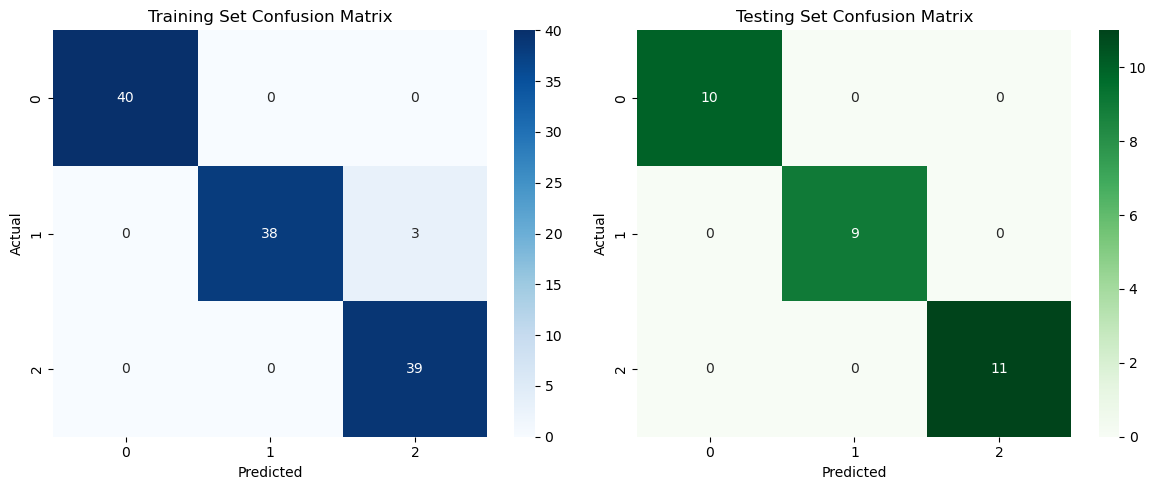

In [72]:
cm_train = confusion_matrix(y_lg_train, y_lg_train_pred)
cm_test = confusion_matrix(y_lg_test, y_lg_test_pred)
 
plt.figure(figsize=(12, 5)) #Creates a figure that is 12 units wide and 5 units tall.

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Training Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plot confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens")
plt.title("Testing Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout() #tight_layout(): Adjusts spacing to avoid overlapping text.

plt.show()  #Displays the full plot.

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !